In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$64K - $106K (Glassdoor est.),Overview\nEach day U.S. Customs and Border Pro...,4.3,ManTech International Corporation\n4.3,"Alexandria, VA",5001 to 10000 Employees,1968,Company - Public,Research & Development,...,106,85.0,ManTech International Corporation,VA,52,0,0,0,0,0
1,Data Scientist,$125K - $154K (Glassdoor est.),"Are you passionate about using data, finding i...",4.3,TaylorMade Golf\n4.3,"Carlsbad, CA",1001 to 5000 Employees,1979,Company - Private,Consumer Products Manufacturing,...,154,139.5,TaylorMade Golf,CA,41,0,0,0,0,0
2,"Data Scientist, LiveRamp Safe Haven",$140K - $150K (Employer est.),LiveRamp is the leading data connectivity plat...,4.3,LiveRamp\n4.3,"San Francisco, CA",1001 to 5000 Employees,2005,Company - Public,Computer Hardware & Software,...,150,145.0,LiveRamp,CA,15,0,0,0,0,0
3,Senior Bioinfo Scientist,$66K - $138K (Glassdoor est.),Conduct bioinformatic analysis on research pro...,3.8,Inova Health System\n3.8,"Falls Church, VA",10000+ Employees,1956,Nonprofit Organization,Health Care Services & Hospitals,...,138,102.0,Inova Health System,VA,64,0,0,0,0,0
4,Scientist II,$132K - $144K (Glassdoor est.),Job Title: Scientist II\nDepartment: Product D...,2.5,Decision Sciences\n2.5,"Poway, CA",1 to 50 Employees,-1,Advertising & Marketing,Business Services,...,144,138.0,Decision Sciences,CA,-1,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    231
na                 89
analyst            55
data engineer      36
mle                15
manager            11
director            1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        389
senior     49
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    97
MD    37
VA    33
NY    28
IL    27
MA    23
TX    23
DC    16
GA    14
FL    13
UT    12
WA    12
NJ    12
IN    10
PA    10
WI     9
NC     8
TN     7
MO     6
OH     4
MN     4
ME     4
AZ     4
KS     4
CT     3
NV     3
OR     3
CO     3
NH     3
ID     2
RI     2
IA     1
MI     1
Name: job_state, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(str(x)))
df['desc_len']

0       909
1      1394
2      1188
3      2092
4       548
       ... 
433     882
434     122
435     682
436    2062
437      96
Name: desc_len, Length: 438, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
99,1,42,58
100,1,42,58


In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len
count,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000
mean,3.545205,1627.534247,0.004566,0.0,77.847032,124.075342,100.847032,37.000000,0.070776,0.0,0.036530,0.052511,0.109589,1298.755708
std,1.329359,753.972656,0.067496,0.0,30.513183,41.601370,35.233083,42.432717,0.256744,0.0,0.187819,0.223311,0.312734,994.390971
min,-1.000000,-1.000000,0.000000,0.0,17.000000,41.000000,25.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000
25%,3.500000,1911.250000,0.000000,0.0,58.000000,96.500000,76.625000,8.000000,0.000000,0.0,0.000000,0.000000,0.000000,729.500000
50%,3.800000,1981.000000,0.000000,0.0,75.500000,120.000000,98.250000,23.000000,0.000000,0.0,0.000000,0.000000,0.000000,986.000000
75%,4.200000,2001.000000,0.000000,0.0,96.750000,150.000000,124.000000,51.000000,0.000000,0.0,0.000000,0.000000,0.000000,1457.750000
max,5.000000,2019.000000,1.000000,0.0,297.000000,470.000000,383.500000,233.000000,1.000000,0.0,1.000000,1.000000,1.000000,6841.000000


<AxesSubplot:>

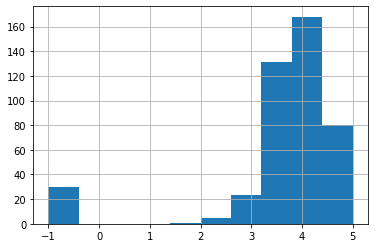

In [14]:
df.Rating.hist()

<AxesSubplot:>

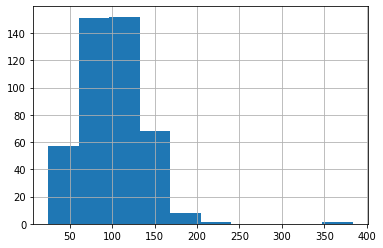

In [15]:
df.avg_salary.hist()

<AxesSubplot:>

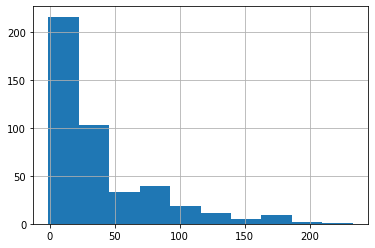

In [16]:
df.age.hist()

<AxesSubplot:>

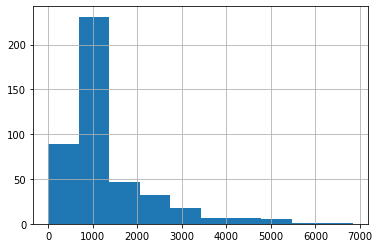

In [17]:
df.desc_len.hist()

<AxesSubplot:>

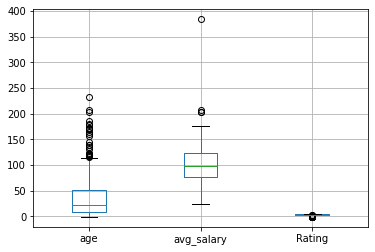

In [18]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

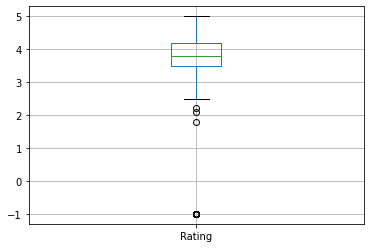

In [19]:
df.boxplot(column = 'Rating')

In [20]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.041190,0.221128,0.085167
avg_salary,-0.041190,1.000000,0.178727,0.141182
Rating,0.221128,0.178727,1.000000,0.071013
desc_len,0.085167,0.141182,0.071013,1.000000


In [21]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 169


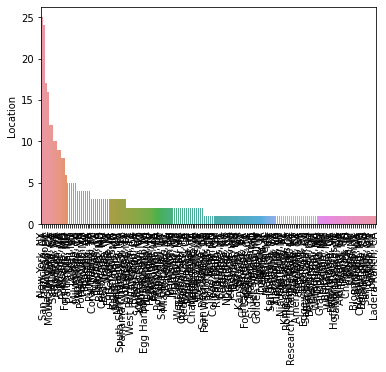

graph for Size: total = 9


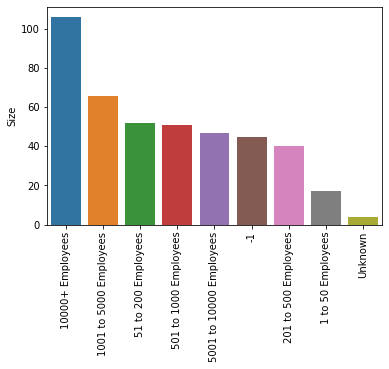

graph for Type of ownership: total = 23


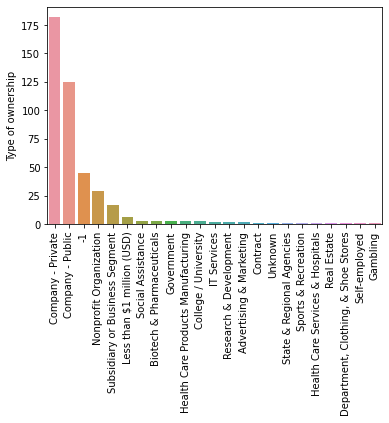

graph for Industry: total = 61


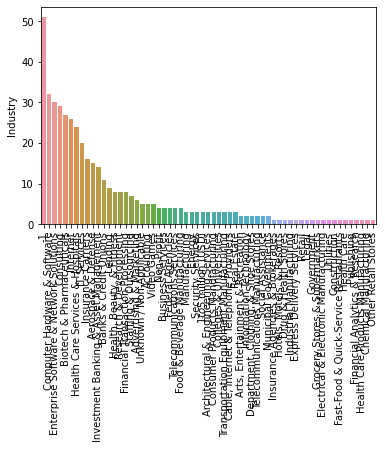

graph for Sector: total = 32


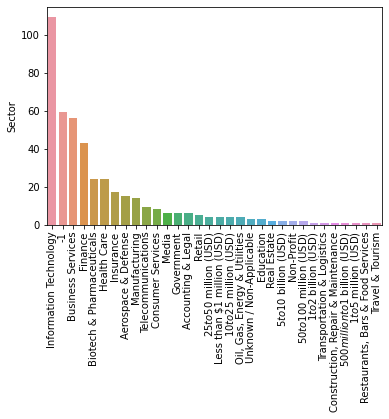

graph for Revenue: total = 14


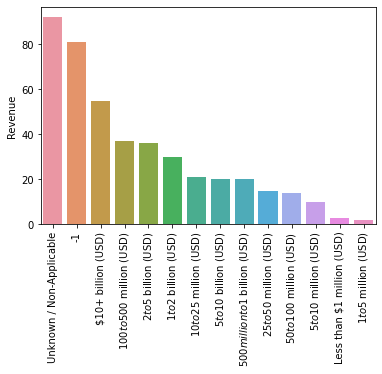

graph for company_txt: total = 285


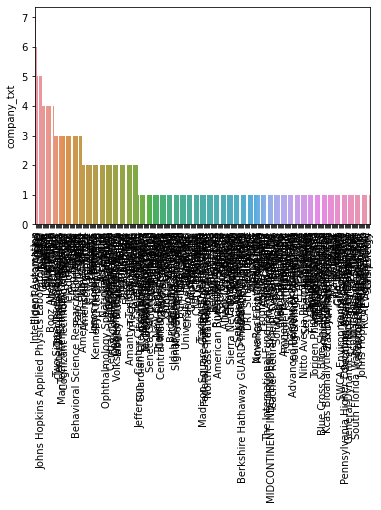

graph for job_state: total = 33


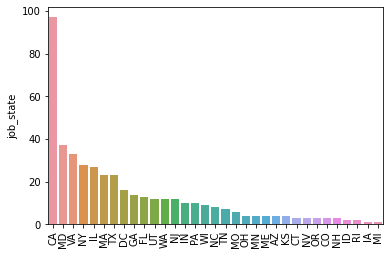

graph for python_yn: total = 2


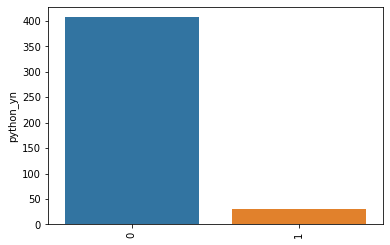

graph for R_yn: total = 1


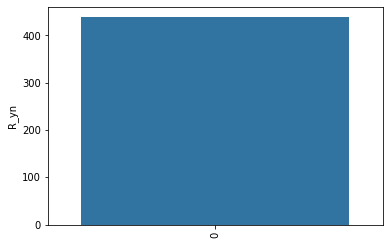

graph for spark: total = 2


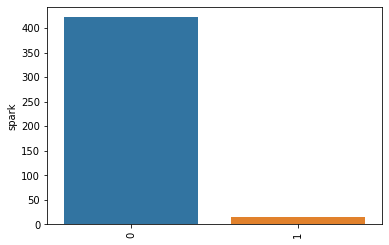

graph for aws: total = 2


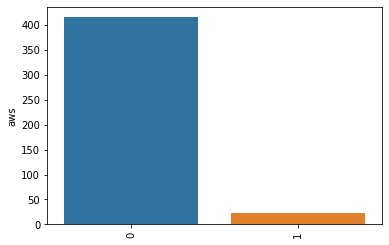

graph for excel: total = 2


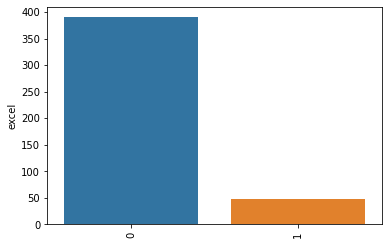

graph for job_simp: total = 7


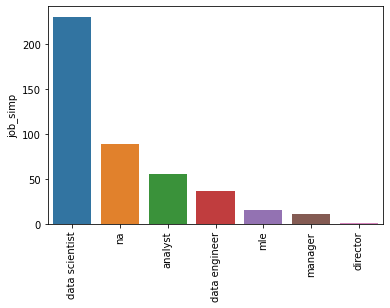

graph for seniority: total = 2


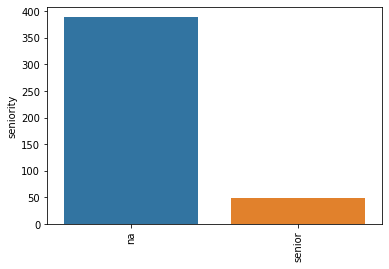

In [22]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


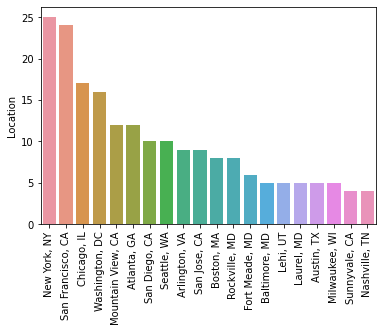

graph for company_txt: total = 20


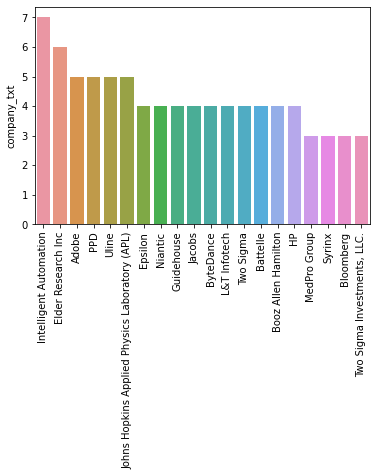

In [23]:

for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [24]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,64.172727
data engineer,100.277778
data scientist,115.121212
director,67.000000
manager,96.318182
mle,110.100000
na,86.073034


In [25]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          59.489362
               senior      91.687500
data engineer  na         101.718750
               senior      88.750000
data scientist na         112.724638
               senior     135.791667
director       senior      67.000000
manager        na          96.318182
mle            na          98.590909
               senior     141.750000
na             na          85.370370
               senior      93.187500

In [26]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                  73.500
          manager             81.500
          data scientist      67.500
          analyst             72.000
WA        na                 121.500
...                              ...
CA        mle                151.000
          na                 100.875
          data engineer      122.125
AZ        data engineer       67.500
          analyst             65.500

[101 rows x 1 columns]

In [27]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       2
          manager                  4
          data scientist           2
          analyst                  1
WA        na                       2
...                              ...
CA        mle                      3
          na                      12
          data engineer            4
AZ        data engineer            1
          analyst                  3

[101 rows x 1 columns]

In [28]:

pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
WA,165.000000
OR,144.500000
CA,132.638889
NY,131.045455
IL,124.647059
KS,122.500000
NJ,122.500000
TX,111.700000
DC,110.041667


In [29]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [30]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 3.2    141.428571
 4.5    130.861111
 4.3    124.633333
 4.4    121.421053
 5.0    120.875000
 4.1    107.352941
 2.5    106.500000
 4.8    106.500000
 4.6    104.357143
 4.7    104.307692
 3.8    103.138889
 4.2    102.759259
 4.9    101.071429
 4.0    100.740000
 3.5    100.481481
 3.0     98.250000
 3.6     97.068966
 3.7     92.890244
 3.4     92.846154
 1.8     91.500000
 3.9     90.416667
 3.1     88.722222
-1.0     86.966667
 3.3     83.821429
 2.7     83.166667
 2.8     63.571429
 2.2     44.500000
 2.1     41.000000
Industry
                                  avg_salary
Industry                                    
Drug & Health Stores              383.500000
Video Games                       151.700000
Retail                            146.500000
Consumer Products Manufacturing   128.166667
Financial Analytics & Research    128.000000
...                                      ...
Other Retail Stores                59.500000
Non-Profi

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [32]:
df.to_csv('C:/Users/alexa/OneDrive/Documentos/ds_salary_proj/eda_data.csv')